## Linear Regression

This notebook details the use of Linear Regression using the infamous **Iris Dataset**

I'll go step by step to show the process of 
* Obtaining the data
* Processing the data 
* Analyzing to to formulate problem 
* Understanding the probem 
* Training the data through the algorithm 
* Concluding with Results

In [1]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
import math
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

/Users/Mac-NB/Envs/AI/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


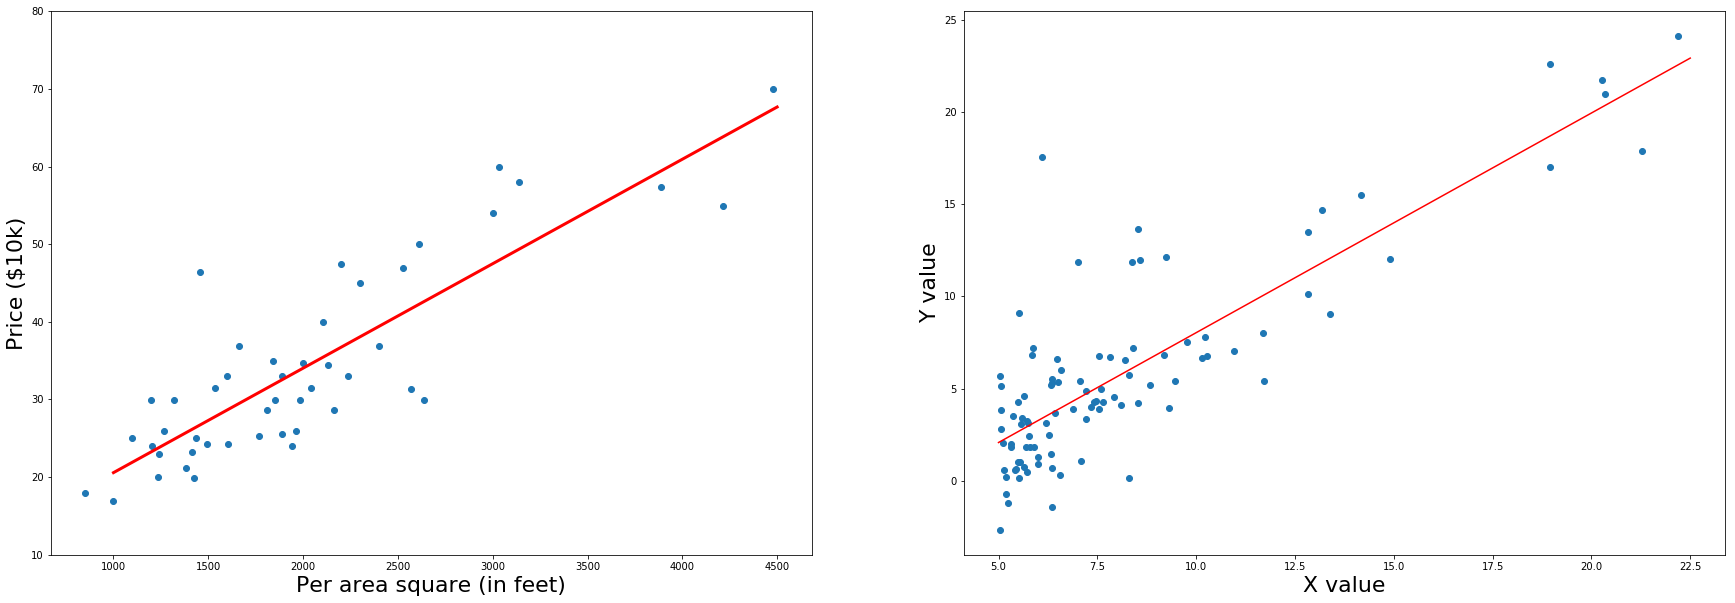

In [2]:
regr = linear_model.LinearRegression()
rand_regression_data = pd.read_csv('Dataset/random_regress.csv', header=None)
X_rr_train = rand_regression_data[0].values.reshape(-1,1)
y_rr_train = rand_regression_data[1].values.reshape(-1,1)

house_cols = ['per square area', 'Number Rooms', "Price"]
house_data = pd.read_csv("Dataset/Housing_data.csv", header=None, names=house_cols)

fig, ax = plt.subplots(1, 2, figsize=(30,10))


house_area = house_data['per square area'].values 
house_price = house_data['Price'] * (1/10000)
house_price = house_price.values

for subplots in range(len(ax)):
    if subplots == 0:
        regr.fit(house_area.reshape(-1,1),house_price.reshape(-1,1))
        x_house_fit = np.linspace(1000,4500,25)
        ax[subplots].scatter(house_area,house_price)
        ax[subplots].set_ylim(10,80)
        ax[subplots].plot(x_house_fit, regr.predict(x_house_fit.reshape(-1,1)), color='r', linewidth=3)
        ax[subplots].set_xlabel('Per area square (in feet)',fontsize=22)
        ax[subplots].set_ylabel('Price ($10k)', fontsize=22)
    elif subplots == 1:
        regr.fit(X_rr_train,y_rr_train)
        xfit = np.linspace(5,22.5, 25)
        xfit = xfit.reshape(-1,1)
        ax[subplots].scatter(X_rr_train,y_rr_train)
        ax[subplots].plot(xfit,regr.predict(xfit), color='red')
        ax[subplots].set_xlabel('X value',fontsize=22)
        ax[subplots].set_ylabel('Y value', fontsize=22)
fig.savefig('regression_cover.png')

### Obtaining the data

This is the infamous Iris Data and is available to download for free from any source. I have made a curated set by seprating some data into Training set and Testing set and can be found [here]() <br/>
The data is stored in local folder called 'Dataset' and is in the form of Comma Seprated Value File '.csv'. <br />
Using Pandas library to load the csv file into Pandas Dataframe so as to work with data easily using *read_csv()* function and is used to load both the training as well as test dataset. <br />
Since the data has no headers of its own I am using my own defined headers in place. 

In [3]:
col_names = ['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)', 'Petal Width(cm)', 'Type']
iris_data = pd.read_csv('Dataset/iris_dataset.csv', header=None, names = col_names)
test_iris_data = pd.read_csv('Dataset/iris_dataset_test.csv', header=None, names = col_names)

# Collect the Type of Data or Species 
species_type = set(iris_data['Type'])

print("The Species are: ", species_type)

# Check the data
iris_data.head()

The Species are:  {'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Pre-Processing
Usually in this step we pre process the data that is converting Categorical Values to Numerical where needed, filling empty with default or idicating values, deleting outliers etc. <br />
But for a simple dataset such as this we don't need to do heavy processing as the values are complete and the only categorical value out here is the 'Species Type' which we convert into Numerical values.

In [4]:
# Initialize the Label Encoder to convert categorical data
cat_encoder = preprocessing.LabelEncoder()

# Use the encoder to transform categorical data into numerical value
iris_data['Type'] = cat_encoder.fit_transform(iris_data['Type'])
test_iris_data['Type'] = cat_encoder.fit_transform(test_iris_data['Type'])

# Check the data 
iris_data.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Number of Y or Label Class for this Data
y_func_num = 1

# Getting Number of Columns of data excluding the Class labels
fig_rows_cols = iris_data.shape[1] - y_func_num

# To be used for plotting in the graph
colors = ['red', 'green', 'blue']

# Collecting the values of Species type after it's transformed into Numerical value
species_set = set(iris_data['Type'])

### Visualization 

This step is an important part of Machine Learning or Data Science, since this is where you try and understand the data by visualizing it. <br />
After visualizing, you tend to understand which model works best for what kind of data as we'll see below why and where we apply Linear Regerssion. <br />
Before we let the AI handle to work out its patterns in the data, just by looking at it we can figure out the patterns ourself so as to tweak the AI to perform better. <br />
You can use various steps to visualize data example in the form of Graphs, PiChart, Image Files, Text, Video, Audio etc. <br />
There are many libraries that help you visualize data for example **MatplotLib, Seaborn, Plotly, D3.js **etc <br />
All of them are great and you should explore them if you can, the library that I am using here is **MatplotLib**. 

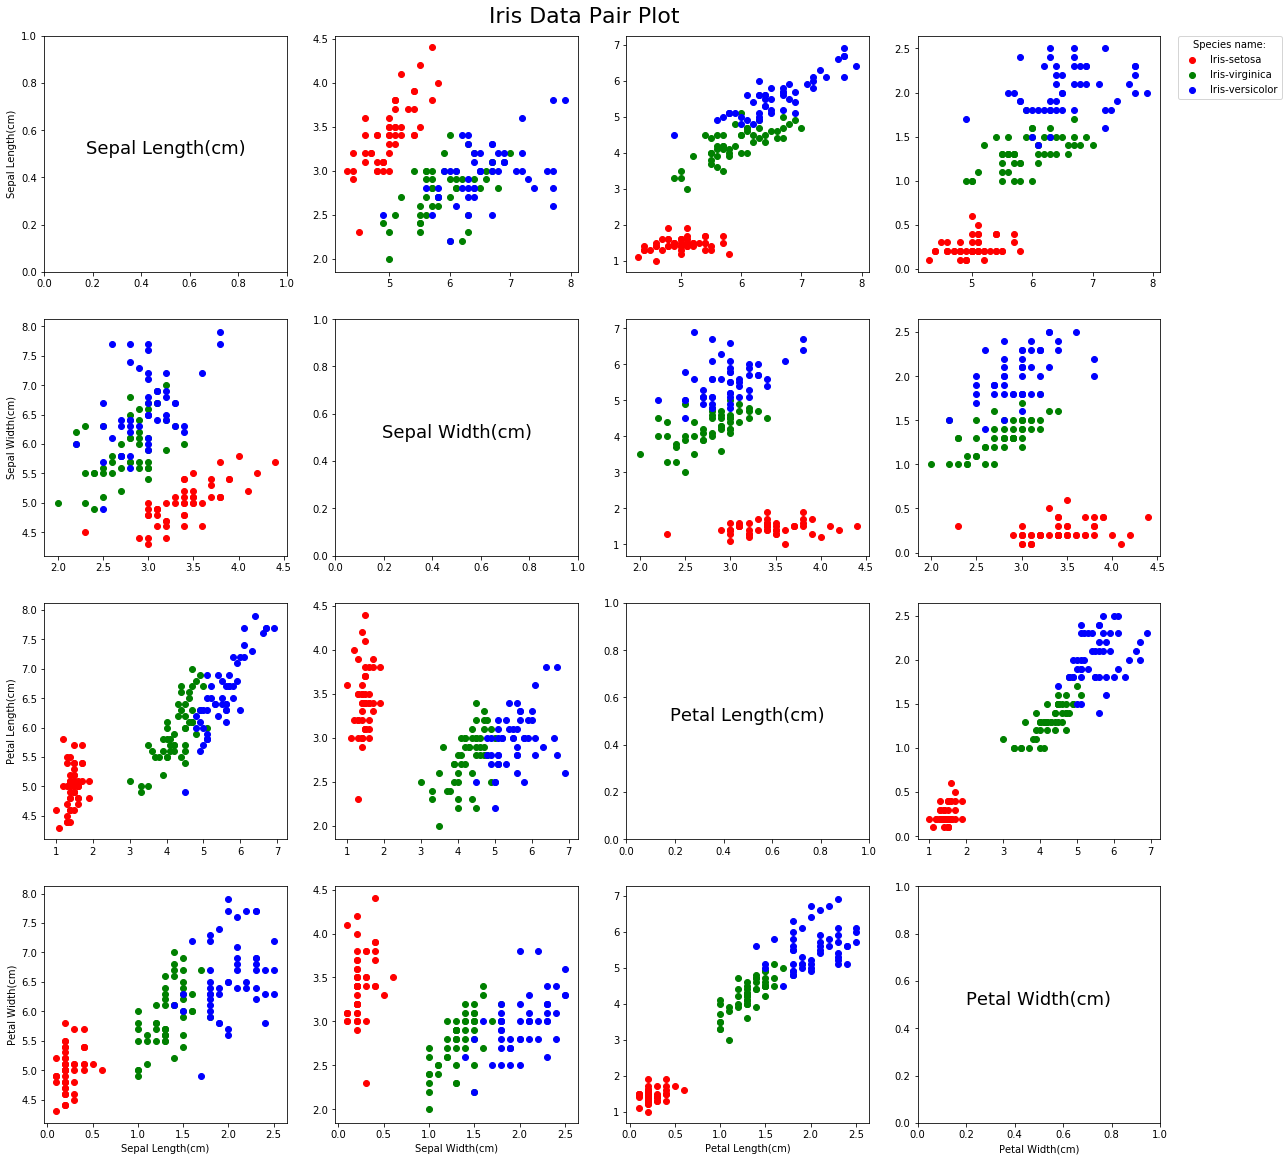

In [6]:
# initializing a new figure to Plot pairs comaparing each Column against other in Iris Data
fig, ax = plt.subplots(fig_rows_cols, fig_rows_cols, figsize=(20,20))

# Go through each Axes (i,j) subplot and Plot the data accordingly
for i in range(fig_rows_cols):
    for j in range(fig_rows_cols):
        if i == j:
            # When the column or attribute encounters itself
            ax[i,j].text(0.5,0.5, col_names[i], fontsize = 18, ha='center')
        else:
            for s in species_set:
                # For each Species plot the data with different color so as to distinguish
                ax[i,j].scatter(iris_data.where(iris_data['Type'] == s).iloc[:,i], 
                                iris_data.where(iris_data['Type'] == s).iloc[:,j], 
                                color=colors[s],
                                label=s)
        
        # Plot the legend for only one graph and set the location to make it prominent for all subplots
        if i == 0 and j == 3:
            ax[i,j].legend(species_type,bbox_to_anchor=(1.5, 1), loc=1, borderaxespad=0., title="Species name:")
        
        # Add the X and Y labels only for the outer graphs 
        if i == (fig_rows_cols - 1):
            if j == 0: 
                ax[i,j].set_ylabel(col_names[i])
            ax[i,j].set_xlabel(col_names[j])
        elif j == 0: 
            ax[i,j].set_ylabel(col_names[i])
            
# Add common title for all subplots             
st = fig.suptitle('Iris Data Pair Plot', fontsize=22)
st.set_y(0.90)

# save the graph in PNG format on local machine
fig.savefig('Iris_Pair_plot.png')

From this pair plot we see that Petal Width and Petal Length data plotted together is in the form of some straight line, so if we fit a straight line through this data we can get a good estimate on which class the data belongs to for future estimates. <br/>
Though this will not always be the case, plotting the attributes in pair may not be efficient as there may be 1000 of attributes for some other data, in that case we use correlation methods or Dimensionality Reduction methods to reduce the attributes and find relations among them.

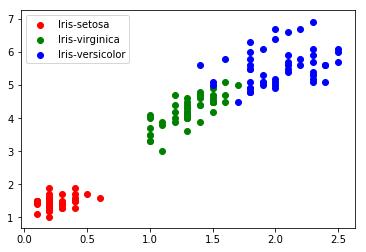

In [7]:
for s in species_set:
    plt.scatter(iris_data.where(iris_data['Type'] == s).loc[:,'Petal Width(cm)'], 
                    iris_data.where(iris_data['Type'] == s).loc[:,'Petal Length(cm)'], 
                    color=colors[s], 
                    label=s)
plt.legend(species_type)
plt.show()

### Setting up the Data for Training the Algorithm

So you are done with pre processing and visualizing the data and know which model to apply on the data. As we are discussing about Linear Regression, its obvious that we are applying linear regression but from our visualization we saw that applying Linear Regression on Petal Length and Petal Width data will give us much better results over other data. <br />
Note that this may not be the case in other datas, where we may have to use more than two attributes and it would not be possible to showcase all the data on 2D plots even if Linear Regression works. <br/>
The step in this process is to prepare the data for the model. Since we take only the Petal Width and Petal Length column for Training Data(X) the shape of data is 150 Rows X 2 Columns and Train Data(Y) is 150 X 1 <br />
The Testing Data(X) is 23 X 2 and Testing Data(Y) is 23 X 1

In [8]:
X = iris_data[['Petal Width(cm)', 'Petal Length(cm)']]
X.shape

(150, 2)

In [9]:
Y = iris_data['Type']
Y.shape

(150,)

In [10]:
X_test = test_iris_data[['Petal Width(cm)', 'Petal Length(cm)']]
X_test.shape

(23, 2)

In [11]:
Y_test = test_iris_data['Type']
Y_test.shape

(23,)

### Training the data

We fit the Data into the model and algorithm learns from the patterns and adjusts the parameters, we then use those parameters to predict future data. <br />
Here we use the predefined Linear Regression from Scikit-learn Library 

In [12]:
regr = linear_model.LinearRegression()

In [13]:
# Fitting the data
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Let's test by predicting 
y_pred = regr.predict(X_test)
iris_predicted = np.around(y_pred)
iris_predicted

array([ 0.,  0., -0., -0., -0., -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

### Conclusion 

The final part of the process is presenting the conclusion. <br />
Here we can see that when we use our Test data to predict the species type using regression we get 100% accuracy rate that is our model predicted the test data completely correct. <br />
The variance score indicated how well the prediction was made with 1 being the best and 0 being the worst. <br />
The Mean Squared Error rate gives us estimation how much error exist with in the model. (In our case since the model predicted everything correctly the error rate is zero)

In [15]:
# Testing accuracy %
def get_accuracy(y_actual, y_predicted):
    size_of = len(y_actual)
    ar = y_actual - y_predicted
    cnt_nzeros = np.count_nonzero(ar)
    num_zeros = size_of - cnt_nzeros
    return (num_zeros / size_of)

In [16]:
def get_metrics_data(y_actual, y_predicted):
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_actual, y_predicted))

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_actual, y_predicted))
    
    # Accuracy Score
    print('Accuracy percentage: {:.2f} %'.format(accuracy_score(y_actual, y_predicted)*100))

In [17]:
get_metrics_data(Y_test, iris_predicted)

Mean squared error: 0.00
Variance score: 1.00
Accuracy percentage: 100.00 %


### Now let's create our own Linear Regression Algorithm
We create the algorithm using Gradient Descent by minimizing the Mean Squared error Cost Function. The two functions written below:
* The First one calculates the Cost Function given the data and weights
* Second Function calculates the gradient descent and updates all the weights simultaneously 

In [18]:
def computeCostMulti(X,y,weights):
    
    # Number of training examples 
    m = len(y)
    
    # Calculating the Hypothesis
    h = np.dot(X,weights)
    
    # Difference between the predicted - actual
    diff = h - y
    
    # Cost function is the summation of sqaure of difference divided by twice of length
    J_cost = sum(np.power(diff,2)) / (2 * m)
    
    return J_cost

In [19]:
def gradient_descent_multi(X, y, weights, alpha = 0.01, num_iter=10):
    m = len(y)
    cost_history = np.zeros((num_iter,1))
    w_len = len(weights)
    
    y = y.values.reshape(-1,1)
    for niter in range(num_iter):
        
        cost_history[niter] = computeCostMulti(X,y,weights)
        h_weight = np.inner(X,np.transpose(weights)) - y
        h_weight = h_weight.reshape(-1,1)
        
        for i in range(w_len):
            x_val = X.iloc[:,i].values.reshape(-1,1)
            s = np.sum(np.multiply(h_weight, x_val))
            offseter = alpha * s * (1/m)
            weights[i] = weights[i] - offseter
    
    return (cost_history,weights)

In [20]:
X = iris_data[['Petal Width(cm)', 'Petal Length(cm)']]
wts = np.zeros((3,1)) 
ones = pd.DataFrame(np.ones((150,1)))
X = pd.concat([ones, X], axis=1)


In [21]:
c_hist, wts = gradient_descent_multi(X, Y, wts,alpha =0.05, num_iter=2000)
print("Weights", wts)

Weights [[-0.43113587]
 [ 0.61709472]
 [ 0.18391796]]


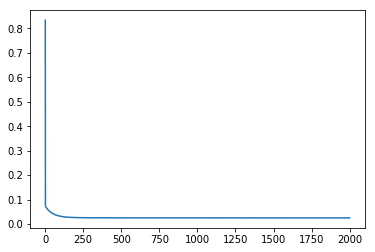

In [22]:
plt.plot(np.arange(1,2001),c_hist)

In [23]:
def predict(Xval,weights):
    return np.dot(Xval,weights)

In [24]:
X_test = test_iris_data[['Petal Width(cm)', 'Petal Length(cm)']]
X_test = pd.concat([pd.DataFrame(np.ones((23,1))), X_test], axis=1)
grad_pred = np.around(predict(X_test,wts))
get_metrics_data(grad_pred,Y_test)

Mean squared error: 0.00
Variance score: 1.00
Accuracy percentage: 100.00 %


### Conclusion
We notice that the accuracy percentage is the same and since our cost function graph reduces with number of iteration. We can safely say that our algortihm works perfectly. <br/>
Another thing to note here is that bulding your own gradient descent or Linear Regression algortihm is a good way to learn but in real world scenario we should be using the tools that are already developed for this purpose as they are written by number of developers therfore they are much more optimized and secure than our algorithm, hence I will be using the tools from here onwards unless only to explain the workings of the algorithm. 

### Lets check out another data

This data was obtained from UCI Machine Learning repository [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) and contains 11 set of features which describe each wines quality

In [25]:
wine_data = pd.read_csv('Dataset/winequality-white.csv')

X_wine = wine_data.iloc[:,:-1]
y_wine = wine_data.iloc[:,-1]

In [26]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
wine_cols = wine_data.columns.values
len_attr = len(wine_cols)

In the previous Iris Data set I curated my own Training and Testing set since the samples were small, but for a larger amount of data it is better to use different functions that does this for you. One function that I have used is scikit-learns train_test_split. 

In [28]:
X_ww_train, X_ww_test, y_ww_train, y_ww_test = train_test_split(X_wine,y_wine, 
                                                                test_size=0.20, random_state=42)

In [29]:
print("Shape of X Train:", X_ww_train.shape)
print("Shape of X Test:", X_ww_test.shape)
print("Shape of Y Train:", y_ww_train.shape)
print("Shape of Y Test:", y_ww_test.shape)

Shape of X Train: (3918, 11)
Shape of X Test: (980, 11)
Shape of Y Train: (3918,)
Shape of Y Test: (980,)


In [30]:
# Column name
col_names = X_wine.columns.values

# Number of Y or Label Class for this Data
y_func_num = 1

# Getting Number of Columns of data excluding the Class labels
plots_rows_cols = wine_data.shape[1] - y_func_num

# To be used for plotting in the graph
colors = {3:'red', 4:'green', 5:'blue',6:'brown',7:'purple',8:'gray',9:'gold'}

# Collecting the values of Species type after it's transformed into Numerical value
quality_set = set(wine_data['quality'])

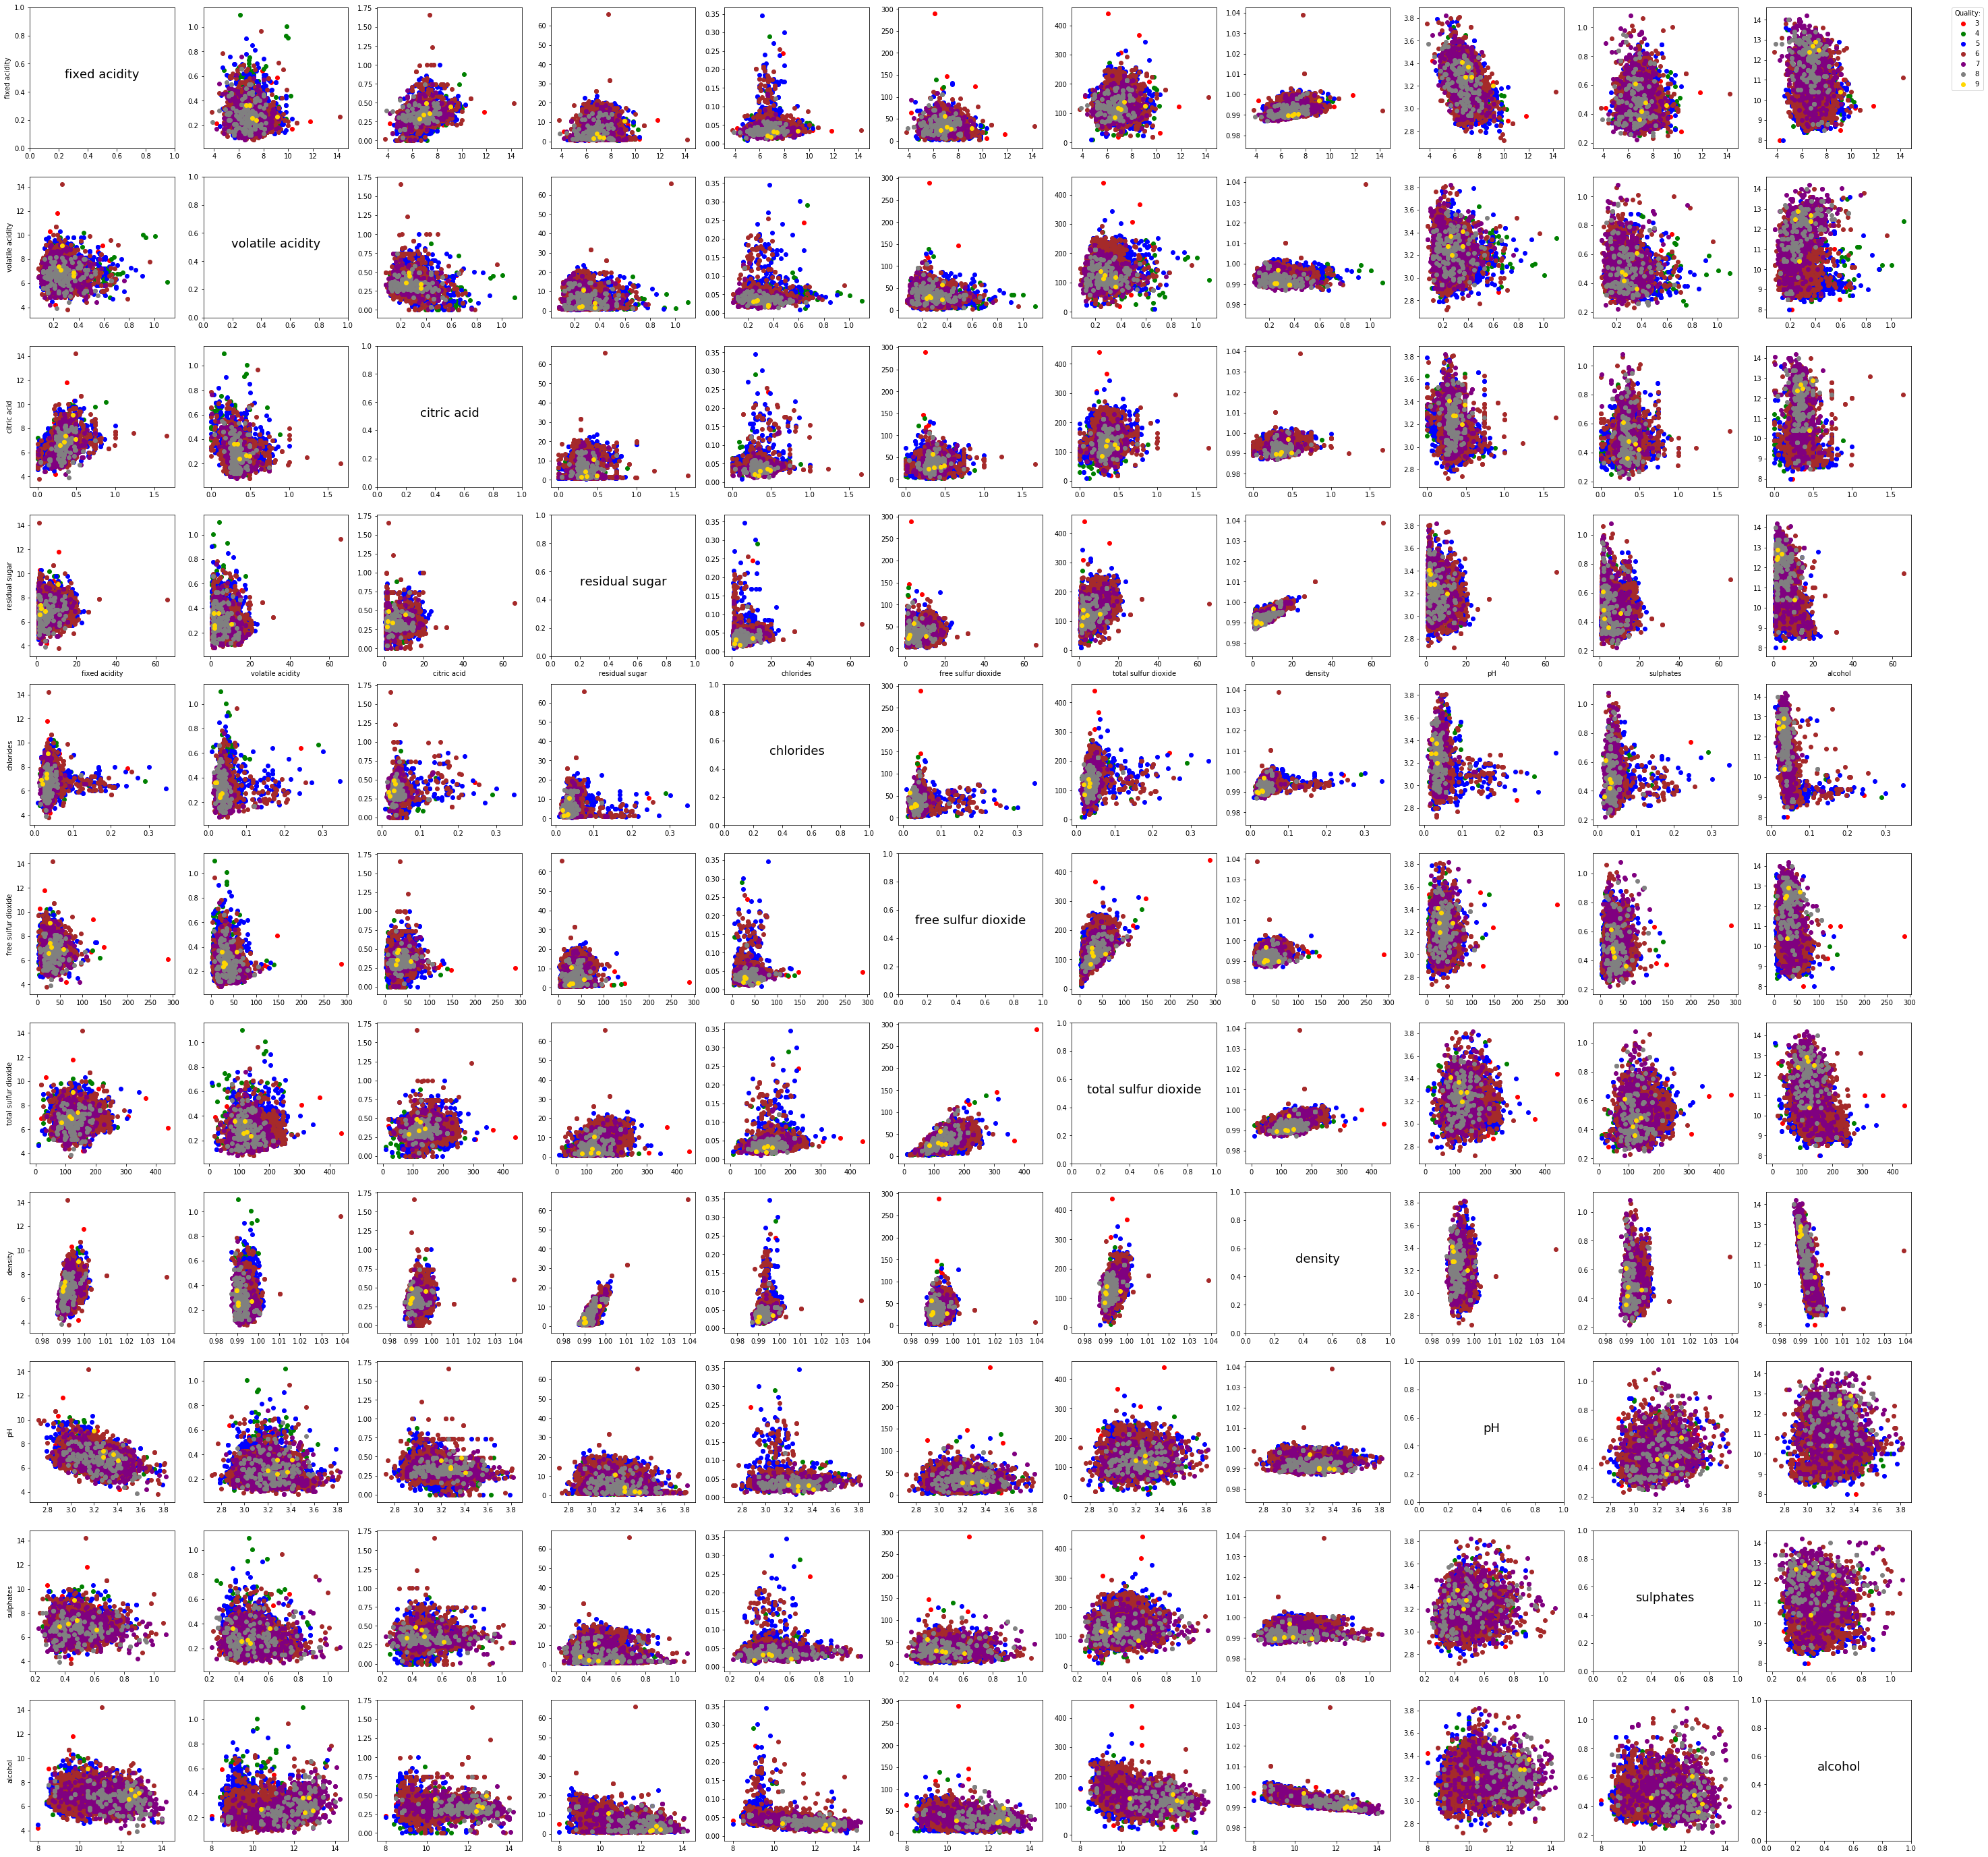

In [31]:
# initializing a new figure to Plot pairs comaparing each Column against other in Iris Data
fig, ax = plt.subplots(plots_rows_cols, plots_rows_cols, figsize=(50,50))

# Go through each Axes (i,j) subplot and Plot the data accordingly
for i in range(plots_rows_cols):
    for j in range(plots_rows_cols):
        if i == j:
            # When the column or attribute encounters itself
            ax[i,j].text(0.5,0.5, col_names[i], fontsize = 18, ha='center')
        else:
            for s in quality_set:
                # For each Species plot the data with different color so as to distinguish
                ax[i,j].scatter(wine_data.where(wine_data['quality'] == s).iloc[:,i], 
                                wine_data.where(wine_data['quality'] == s).iloc[:,j], 
                                color=colors[s],
                                label=s)
        
        # Plot the legend for only one graph and set the location to make it prominent for all subplots
        if i == 0 and j == (plots_rows_cols-1):
            ax[i,j].legend(quality_set,bbox_to_anchor=(1.5, 1), loc=1, borderaxespad=0., title="Quality:")
        
        # Add the X and Y labels only for the outer graphs 
        if i == (fig_rows_cols - 1):
            if j == 0: 
                ax[i,j].set_ylabel(col_names[i])
            ax[i,j].set_xlabel(col_names[j])
        elif j == 0: 
            ax[i,j].set_ylabel(col_names[i])


From the above picture we can see that visualizing pair plot for so many features becomes cluttered so we understand that this is not a good way to visualize such a larger feature dataset. <br/>
There are other various forms of visualization as we see below, from plotting histogram to describing the mean, std etc. of the data

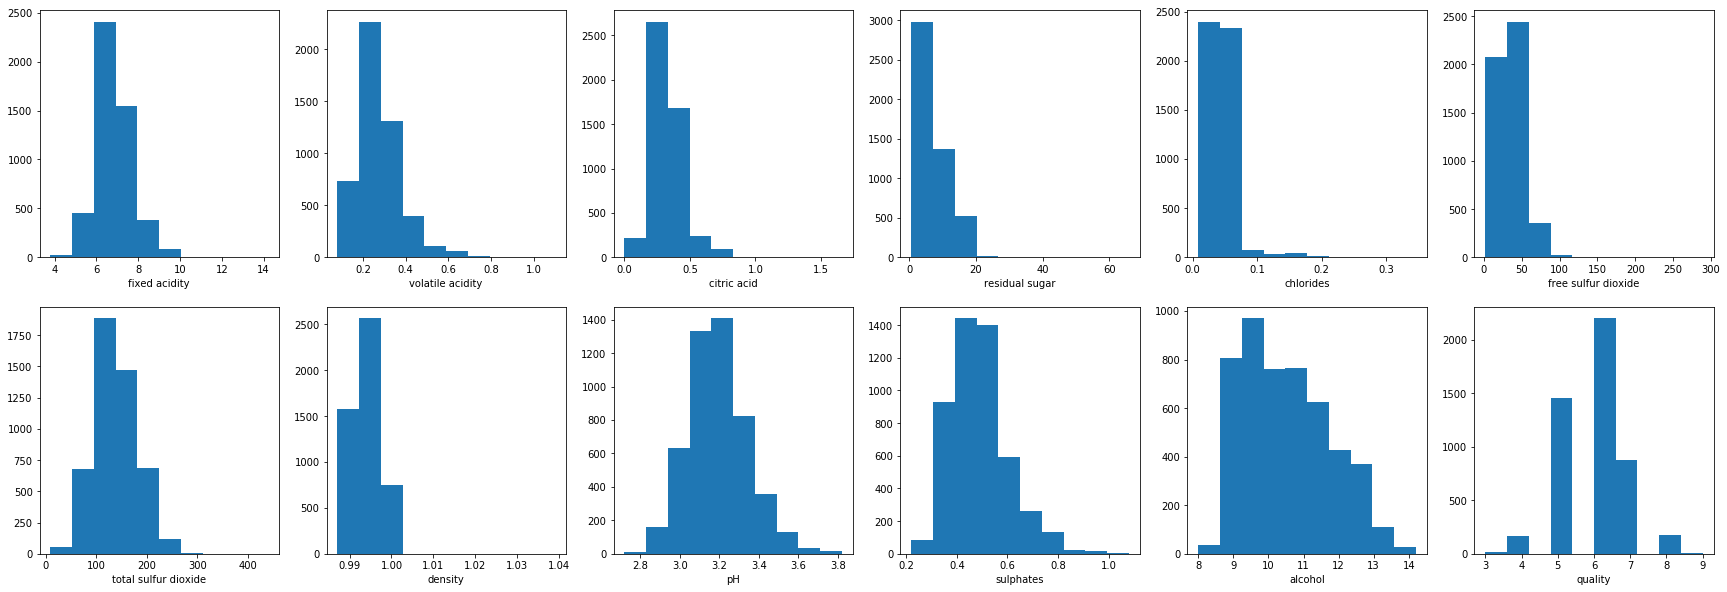

In [32]:
fig, ax = plt.subplots(2, 6, figsize=(30,10))
w_counter = 0
for i in range(2):
    for j in range(6):
        if w_counter != len_attr:
            ax[i,j].hist(wine_data[wine_cols[w_counter]])
            ax[i,j].set_xlabel(wine_cols[w_counter])
            w_counter += 1

In [33]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Now we apply the data to Linear Regression

In [34]:
wine_regr = linear_model.LinearRegression(normalize=True)

In [35]:
wine_regr.fit(X_ww_train,y_ww_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [36]:
y_wine_pred = wine_regr.predict(X_ww_test)

In [37]:
y_w_pred = np.around(y_wine_pred)

In [38]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_ww_test, y_w_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_ww_test, y_w_pred))

# Accuracy Score
print('Accuracy percentage: {:.2f} %'.format(accuracy_score(y_ww_test, y_w_pred)*100))

Mean squared error: 0.66
Variance score: 0.14
Accuracy percentage: 51.33 %


## Uh-oh
well the accuracy is pretty low, why did that happen ? 
Don't be disheartened if the accuracy is pretty low, there are lot of reasons as to why this is happening.
Some of the reasons could be the data is inaccurate, there are many outliers present, Normalizing the data could improve the accuracy, etc. 
I leave all of this for you to try.
There is one method that I'll show you which is called Cross Validation. What this does is it takes in a number say 10 (cv) and splits the data into 10 fold where 9 folds of the data is used for training and 1 is used for Testing and it repeats this process for each folds. Let's see what happens 

In [39]:
score = cross_val_score(wine_regr, X_ww_train,y_ww_train, cv=10)
score.mean()

0.27684452524298503

In [40]:
predicted_test = cross_val_predict(wine_regr, X_ww_test, y_ww_test, cv=5)
predicted_test = np.around(predicted_test)
accuracy_score(y_ww_test,predicted_test)*100

51.938775510204081

Okay this did improve our accuracy !! 
Not by much but it still did and even smaller improvements can make our model much better and they mean a huge deal in reality. 